# Project - Credit Card Fraud Detector


### Abstract
Credit card which is the mode through which many financial institutions uses to transact business between clients has become very important for easy access to funds anywhere at any time. But in recent years many financial institutions have encountered many issues of credit card fraud which has a higher effect on both the client of the bank and the institution. On this basis, this project is geared towards detecting credit card fraud and how we can use various machine Learning algorithms to detect the fraudulent transactions.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### Feature Information
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 


* Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* The feature 'Amount' is the transaction Amount.
* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Authors
Chike Joseph Okwudiafor


Eric Oyemam-Ato Brown


Obehi Irekponor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ccfd = pd.read_csv("creditcard.csv")

In [3]:
ccfd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ccfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Checking for Null Values

In [5]:
ccfd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
ccfd.Class.isnull().sum() #checking for null values

0

### Data Pre-processing is done and we move to finding interesting insights about our Data

## Exploratory Data Analysis
Since PCA was already carried out for V1 to V28 and thereby making them anonymized. We decided to focus our Exploratory Data Analysis on Amount, Time, and Class.

In [7]:
ccfd['Class'].value_counts()/ccfd.shape[0] #checking for the percentage difference in our data set, since it is unbalanced

0    0.998273
1    0.001727
Name: Class, dtype: float64

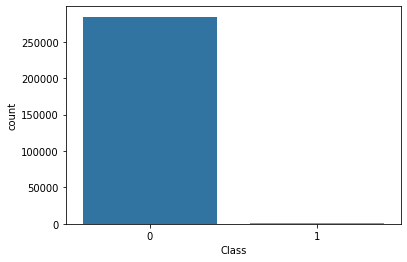

In [8]:
sns.countplot(x="Class",data=ccfd)

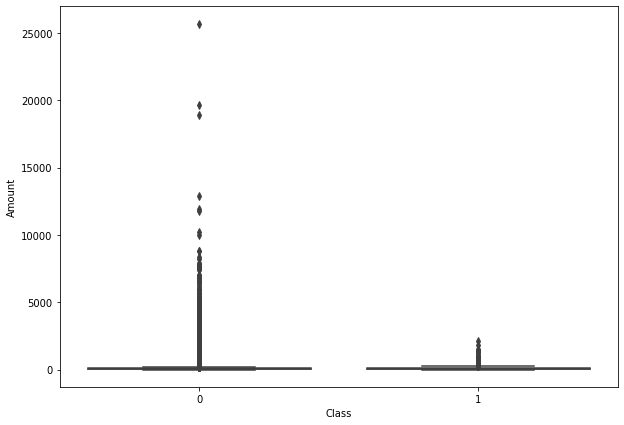

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Class", y="Amount",data=ccfd)

In [10]:
ccfd[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


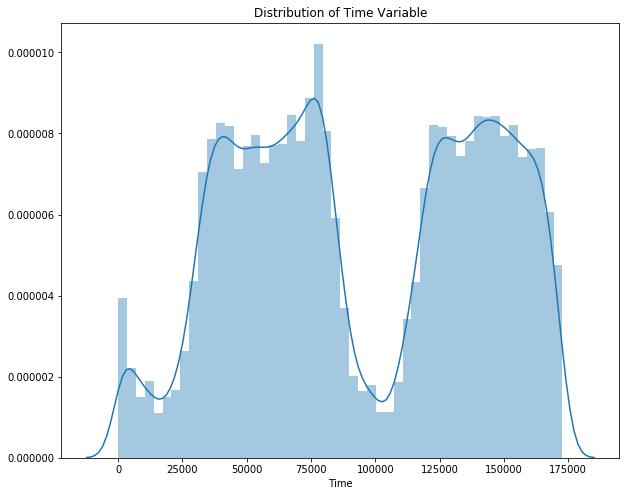

In [11]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Variable')
sns.distplot(ccfd.Time)

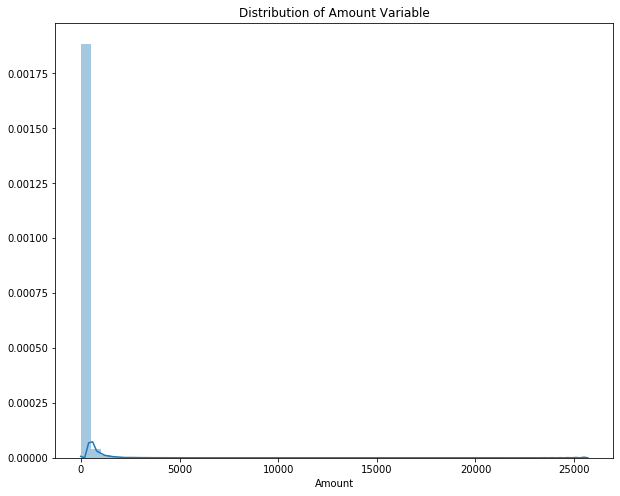

In [12]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Variable')
sns.distplot(ccfd['Amount'])
plt.show()

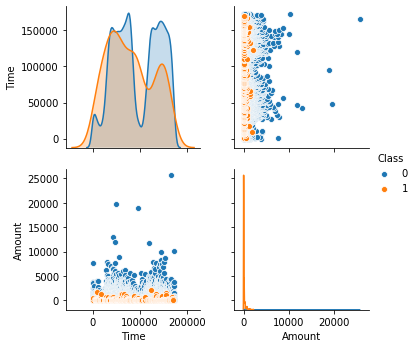

In [13]:
sns.pairplot(data=ccfd,vars=["Time","Amount"],hue="Class")

## Breakdown of Fraud vs Non Fraud Transactions for Time and Amount Variables

In [14]:
Fraud = ccfd[ccfd["Class"]==1]
Non_Fraud= ccfd[ccfd["Class"]==0]

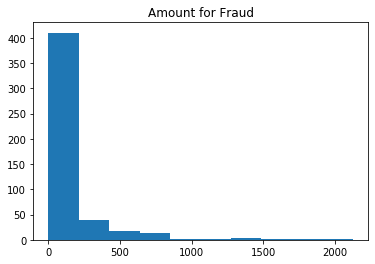

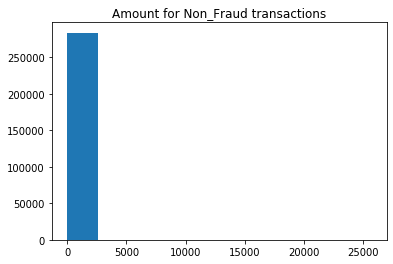

In [15]:
plt.hist(Fraud['Amount'])
plt.title('Amount for Fraud')
plt.show()
plt.hist(Non_Fraud['Amount'])
plt.title('Amount for Non_Fraud transactions')
plt.show()

### From the above analysis we noticed that Fradulent transactions mostly took place between 0 -500

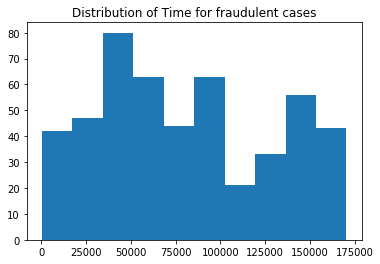

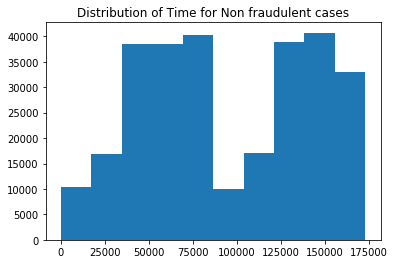

In [16]:
plt.hist(Fraud['Time'])
plt.title('Distribution of Time for fraudulent cases')
plt.show()
plt.hist(Non_Fraud['Time'])
plt.title('Distribution of Time for Non fraudulent cases')
plt.show()

### From the above analysis we can see a dip in time around 100000 seconds for both and that is quite interesting as if we convert 100000 seconds to hours would give around 27 hours, where transactions are less likely to take place. 


#### Correlation Check

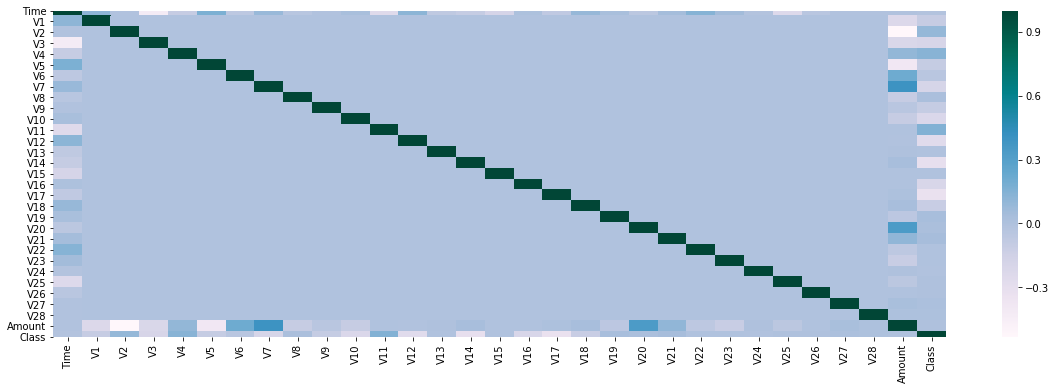

In [17]:
plt.figure(figsize =(20,6))
sns.heatmap(ccfd.corr(),cmap="PuBuGn")

In [18]:
ccfd.groupby(['Class'])['Amount'].count() 

Class
0    284315
1       492
Name: Amount, dtype: int64

# Model 1: k-means Clustering

SInce K-means is unsupervised, we only have X data, we don't have any y data. And since we won't be using Class column, lets drop that

In [19]:
x = ccfd.drop("Class",axis=1)

In [20]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ccfdscaler = StandardScaler()
ccfd_scaled = ccfdscaler.fit_transform(x)

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',random_state=42)

In [25]:
kmeans.fit(ccfd_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [26]:
kmeanspred=kmeans.predict(ccfd_scaled)

In [27]:
ccfd['class_cluster'] = kmeanspred

In [28]:
ccfd['class_cluster'].value_counts()

0    154766
1    130041
Name: class_cluster, dtype: int64

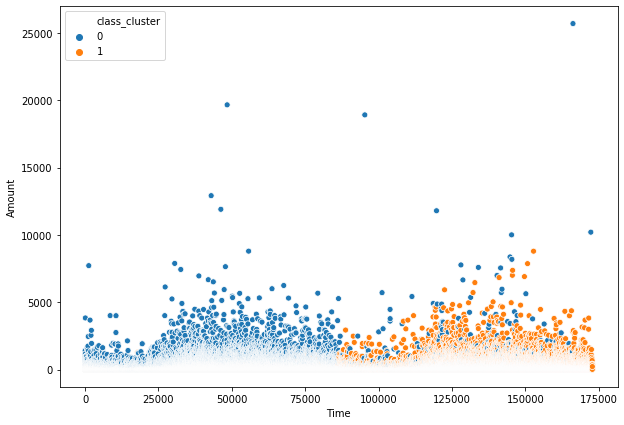

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot("Time", "Amount",data=ccfd,hue="class_cluster")

In [30]:
ccfd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,class_cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


# Train-Test Split

In [31]:
x = ccfd.drop("Class",axis=1)
y = ccfd["Class"]

In [32]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=101)

In [35]:
x.shape

(284807, 31)

In [36]:
y.shape

(284807,)

# Data Scaling for Supervised Learning

In [37]:
stdsc = StandardScaler()

In [38]:
x_train = stdsc.fit_transform(x_train)

In [39]:
x_test = stdsc.transform(x_test)

In [40]:
print(x_test)

[[-0.0946683  -0.08489674  0.91367638 ... -0.67835798 -0.23870432
  -0.91775727]
 [-0.48678868 -0.44366974  0.48547888 ...  0.19144847 -0.29025903
  -0.91775727]
 [-0.39898168 -1.10164145 -0.10801304 ... -0.60495225  1.90890611
  -0.91775727]
 ...
 [-0.56669937  0.5963432   0.24202635 ...  0.08466921 -0.34996469
  -0.91775727]
 [ 0.95503597  1.06426811 -0.09417135 ... -0.28739335 -0.35946054
   1.08961273]
 [ 1.02719774 -3.51197893 -0.1052796  ... -2.87946989 -0.35946054
  -0.91775727]]


In [41]:
print(y_test)

148943    0
110204    0
120616    0
5861      0
201551    0
         ..
100378    0
212130    0
101725    0
215735    0
224025    0
Name: Class, Length: 85443, dtype: int64


# Model 2 - Logistic Regression

Training and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_logmodelpredictions = logmodel.predict(x_test)

Evaluation

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_logmodelpredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.61      0.72       144

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,y_logmodelpredictions)

array([[85287,    12],
       [   56,    88]], dtype=int64)

## Precision Recall Curve for Logistic Regression

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

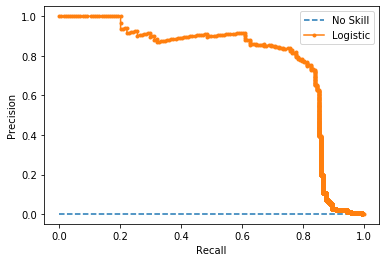

Logistic PR AUC: 0.777


In [50]:
# predict probabilities
yhat = logmodel.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

In [51]:
auc_score = auc(recall, precision)
auc_score

0.776949138625714

# Model 3 - Artificial Neural Network

In [52]:
from keras.models import Sequential

Using TensorFlow backend.


In [53]:
from keras.layers import Dense

In [54]:
classifier = Sequential()

In [55]:
classifier.add(Dense(input_dim=31,units=16,activation="relu"))

In [56]:
classifier.add(Dense(units=17,activation="relu"))

In [57]:
classifier.add(Dense(units=1,activation="sigmoid"))

In [58]:
classifier.compile(optimizer= "adam",loss ="binary_crossentropy",metrics = ["accuracy"])

In [59]:
classifier.fit(x_train,y_train,epochs = 19, batch_size = 100)

Epoch 1/19
199364/199364 [==============================] - 3s 14us/step - loss: 0.0234 - accuracy: 0.9973
Epoch 2/19
199364/199364 [==============================] - 2s 12us/step - loss: 0.0041 - accuracy: 0.9987
Epoch 3/19
199364/199364 [==============================] - 2s 12us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 4/19
199364/199364 [==============================] - 2s 12us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 5/19
199364/199364 [==============================] - 2s 12us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 6/19
199364/199364 [==============================] - 3s 13us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 7/19
199364/199364 [==============================] - 3s 16us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 8/19
199364/199364 [==============================] - 3s 16us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 9/19
199364/199364 [==============================] - 3s 13us/step - loss: 0.0023 - accuracy: 0.9994
Epoch 10/19
199364/199364 [==========

In [60]:
y_pred = classifier.predict(x_test)

In [61]:
y_pred = (y_pred>0.8)
#I set my threshold as 0.8 because of how sensitive the situation is.

In [62]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test,y_pred))

[[85283    16]
 [   35   109]]


In [65]:
from sklearn.metrics import classification_report

In [66]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.87      0.76      0.81       144

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



# Precision Recall Curve - ANN

In [67]:
# predict probabilities
lr_probs = classifier.predict_proba(x_test)

In [68]:
# predict class values
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

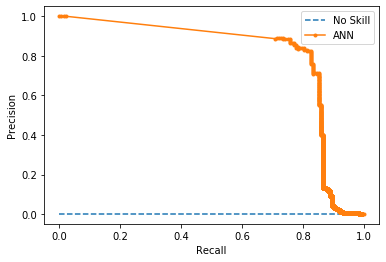

In [70]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='ANN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [69]:
# summarize scores
print('ANN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

ANN: f1=0.810 auc=0.802


# Model 4 - Random Forest

### Training and Predicting

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="entropy",n_estimators=180,random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
y_rfpredictions = rfc.predict(x_test)

In [73]:
print(confusion_matrix(y_test,y_rfpredictions))

[[85294     5]
 [   31   113]]


In [74]:
print(classification_report(y_test,y_rfpredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.96      0.78      0.86       144

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## Precision Recall Curve for Random Forest

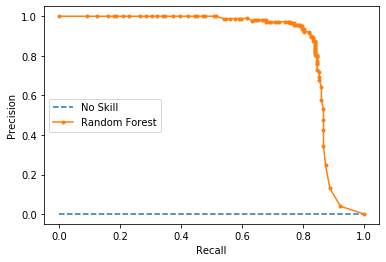

Random Forest PR AUC: 0.859


In [76]:
# predict probabilities
y3 = rfc.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = y3[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
auc_score = auc(recall, precision)
print('Random Forest PR AUC: %.3f' % auc_score)

### Discussion and conclusions
Included in Report 